<a href="https://colab.research.google.com/github/tapiwamesa/OLS-to-Polynomial-Features-Ridge-Regression/blob/main/Using_Ridge_Regression_in_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement

The goal of this project is to develop a predictive model that estimates housing prices in California using a variety of socio-economic and geographic features from the California Housing dataset. This dataset, provided by the U.S. Census Bureau, includes metrics such as median income, average number of rooms, population, and house age — all aggregated at the block group level.

The challenge lies in accurately modeling the relationship between these input features and the target variable, median house value, which is influenced by both linear and potentially complex nonlinear interactions between variables. An initial implementation using Ordinary Least Squares (OLS) regression has shown limited performance, indicating that more advanced modeling techniques may be required to improve prediction accuracy and model generalization.

# Objectives

1. Develop a baseline model using Linear Regression (OLS) and evaluate its performance.

2. Improve model accuracy using regularization (Ridge Regression) and polynomial feature transformations to capture non-linear relationships.

3. Compare all models and identify the most optimal approach based on R² score and generalization to unseen data.

# Exploratory Data Analysis

In [77]:
# importing ncecessary libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [25]:
# Geting the dataset
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

In [26]:
# the dataset is a bunch data type
housing.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [27]:
# Deconstructing the data into a DataFrame
data = pd.DataFrame(housing["data"], columns = housing["feature_names"] )

In [28]:
# Viewing the data
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [29]:
# Appending data with the y variables

data["target"] = housing["target"]
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


*Now that the data is completely into a DataFrame lets explore the data*

In [30]:
# Data types of the data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [31]:
# viewing the number of data entries and features of the data of the data
data.shape

(20640, 9)

In [32]:
# Descriptive data statistics
data.describe().T

,count,mean,std,min,25%,50%,75%,max
MedInc,20640.0,3.870671,1.899822,0.499900,2.563400,3.534800,4.743250,15.000100
HouseAge,20640.0,28.639486,12.585558,1.000000,18.000000,29.000000,37.000000,52.000000
AveRooms,20640.0,5.429000,2.474173,0.846154,4.440716,5.229129,6.052381,141.909091
AveBedrms,20640.0,1.096675,0.473911,0.333333,1.006079,1.048780,1.099526,34.066667
Population,20640.0,1425.476744,1132.462122,3.000000,787.000000,1166.000000,1725.000000,35682.000000
AveOccup,20640.0,3.070655,10.386050,0.692308,2.429741,2.818116,3.282261,1243.333333
Latitude,20640.0,35.631861,2.135952,32.540000,33.930000,34.260000,37.710000,41.950000
Longitude,20640.0,-119.569704,2.003532,-124.350000,-121.800000,-118.490000,-118.010000,-114.310000
target,20640.0,2.068558,1.153956,0.149990,1.196000,1.797000,2.647250,5.000010


<Axes: >

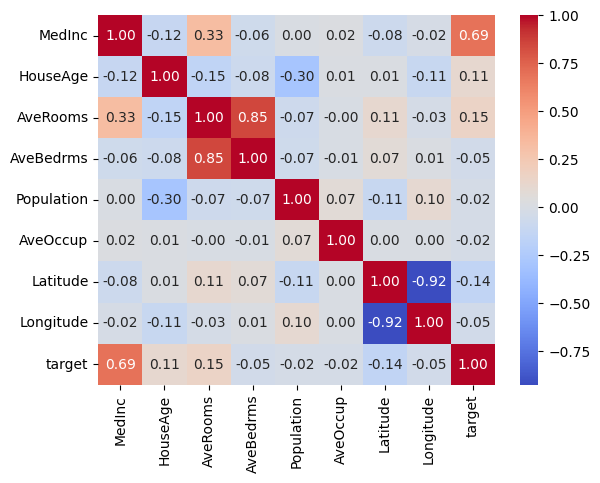

In [33]:
# Lets look at the correlation between the features
sns.heatmap(data.corr(), cmap = "coolwarm", annot = True, fmt = ".2f", )

In [146]:
# Let's look at the relationship between the features
#sns.pairplot(data, diag_kind = "hist")
#plt.show()

# Data Preprocessing

In [35]:
# One more look at the data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
MedInc,20640.0,3.870671,1.899822,0.499900,2.563400,3.534800,4.743250,15.000100
HouseAge,20640.0,28.639486,12.585558,1.000000,18.000000,29.000000,37.000000,52.000000
AveRooms,20640.0,5.429000,2.474173,0.846154,4.440716,5.229129,6.052381,141.909091
AveBedrms,20640.0,1.096675,0.473911,0.333333,1.006079,1.048780,1.099526,34.066667
Population,20640.0,1425.476744,1132.462122,3.000000,787.000000,1166.000000,1725.000000,35682.000000
AveOccup,20640.0,3.070655,10.386050,0.692308,2.429741,2.818116,3.282261,1243.333333
Latitude,20640.0,35.631861,2.135952,32.540000,33.930000,34.260000,37.710000,41.950000
Longitude,20640.0,-119.569704,2.003532,-124.350000,-121.800000,-118.490000,-118.010000,-114.310000
target,20640.0,2.068558,1.153956,0.149990,1.196000,1.797000,2.647250,5.000010


Looking at the descriptive statistics there's so much variability in the data, eg Population data has significantly higher values than MedInc. Longitude data is denoted in negative and positive numbers unlike some other variables. To have the exergarrated inpact of this variability managed in the data we'll standardize the data.

In [41]:
# importing data preprocessing libraries

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [46]:
# Splitting the data into X and y

X = data.iloc[ : , :8]
y = data["target"]

In [47]:
# Splitting the data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [48]:
# Train Data dimensions

X_train.shape, y_train.shape

((14448, 8), (14448,))

In [49]:
# Test Data dimensions

X_test.shape, y_test.shape

((6192, 8), (6192,))

In [53]:
# Scaling the train and test datasets

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 1. Simple Linear Regression (OLS)

In [58]:
# importing the linear regression module
from sklearn.linear_model import LinearRegression

In [59]:
# Training the model

lg = LinearRegression()
lg.fit(X_train_scaled, y_train)
lg.score(X_train_scaled, y_train)

0.6093459727972159

The R-squared of the training phase is 61%, which means that 61% of the variability in the target variable is explained by the model

In [60]:
# Evaluating the model on test data
y_pred = lg.predict(X_test_scaled)
lg.score(X_test_scaled, y_test)

0.5957702326061664

The R-Squared of the test set is 60% which is close enough to the metric of the train set. This metric is very low in both sets and this is a clear sign of underfitting, where the model is too simple to predict the price of the house.

In [67]:
# Importing evaluation metrics for predictions
from sklearn.metrics import r2_score, mean_squared_error

In [70]:
# r2 score predicted variables
print("R_squared Error:", r2_score(y_test, y_pred))
print("\nMean Squared Error:", mean_squared_error(y_test, y_pred))

R_squared Error: 0.5957702326061664

Mean Squared Error: 0.5305677824766752


In as much as the MSE is very low, we are still having an issue of underfitting where the model is simplifying the relationship between the features and the target. Therefor there is poor generalization in this case.

## 2. Employing Ridge Regression to avoid underfitting

In [62]:
# importing the ncessary libraries

from sklearn.linear_model import Ridge

In [71]:
# training the Ridge model
rg = Ridge()
rg.fit(X_train_scaled, y_train)
rg.score(X_train_scaled, y_train)

0.6093458828540789

In [72]:
# Evaluating the model on test data
y_pred_rg = rg.predict(X_test_scaled)
rg.score(X_test_scaled, y_test)

0.5957885548359448

we get the sames results as the OLS, lets try Ridge at varying aplha instances

In [79]:
# training the Ridge model at varying alpha values

results = pd.DataFrame(columns = ["Alpha", "R2"])
parameters = np.arange(0.1, 5.1, 0.1)

for i in parameters:
    rg = Ridge(alpha = i)
    rg.fit(X_train_scaled, y_train)
    r2 = rg.score(X_train_scaled, y_train)
    results.loc[len(results)] = [i, r2]

In [81]:
results

,Alpha,R2
0,0.1,0.609346
1,0.2,0.609346
2,0.3,0.609346
3,0.4,0.609346
4,0.5,0.609346
5,0.6,0.609346
6,0.7,0.609346
7,0.8,0.609346
8,0.9,0.609346
9,1.0,0.609346


We get the same results, this means that Ridge is not working for our dataset.

## 3. OLS with Engineered Features

In [82]:
# viewing the features in our data once more
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


1. Median Income and House Age: Combining these might uncover how income and the age of the house relate together to affect the target.

2. Average Rooms and Average Occupancy: Combining these features might show how the number of rooms and occupancy levels together affect the target.



In [89]:
# Creating a copy of the data
data1 = data.copy()

In [90]:
# Feature Engineering

data1['MedInc_HouseAge'] = data1['MedInc'] * data1['HouseAge']
data1['AveRooms_AveOccup'] = data1['AveRooms'] * data1['AveOccup']

In [91]:
# viewing data with engineered features
data1.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target,MedInc_HouseAge,AveRooms_AveOccup
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,341.3332,17.848325
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,174.3294,13.161483
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,377.3848,23.225510
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,293.4412,14.822293
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,200.0024,13.703657


In [98]:
# splitting the data into X and y

X_fe = data1[['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedInc_HouseAge',
       'AveRooms_AveOccup']]
y_fe = data1['target']

In [99]:
# Splitting data into train and test sets

X_train_fe, X_test_fe, y_train_fe, y_test_fe = train_test_split(X_fe, y_fe, test_size = 0.3, random_state = 42)

In [100]:
# Scaling the data
scaler = StandardScaler()
X_train_fe_scaled = scaler.fit_transform(X_train_fe)
X_test_fe_scaled = scaler.transform(X_test_fe)

In [102]:
# Training the model

lg_fe = LinearRegression()
lg_fe.fit(X_train_fe_scaled, y_train_fe)
training_score = lg_fe.score(X_train_fe_scaled, y_train_fe)
generalization_test = lg_fe.score(X_test_fe_scaled, y_test_fe)

print("Model fitting on training data:", training_score)
print("\nModel Generalization on test data:", generalization_test)

Model fitting on training data: 0.6107162404215041

Model Generalization on test data: 0.5973557116605764


Feature engineering did not improve the model

## 4. Polynomial Features + Ridge Regression

Now, the location of the houses depicted by longitude and latitude values represent a geographical feature which cannot be expressed quantitatively. Ridge and OLS assume a non linear relationship in the model, but here we have latitude and longitude features which we cannot express linearly in the model. In this section we introduce polynomial features in our model to try and capture the non linear relationship in the model.

In [103]:
# importing the dependencies
from sklearn.preprocessing import PolynomialFeatures

In [133]:
# instanciating the PolynomialFeatures of degree 2

poly2 = PolynomialFeatures(degree = 2, include_bias = False)

# We use the scaled taining set from OLS, thus withouth engineered features
X_train_poly2 = poly2.fit_transform(X_train_scaled)
X_test_poly2 = poly2.transform(X_test_scaled)

# Using the Ridge to train the model ata default alpha = 1
rg_py2 = Ridge(alpha = 1.0)
rg_py2.fit(X_train_poly2, y_train)
rg_py2.score(X_train_poly2, y_train)

0.6838030373729957

In [134]:
# Evaluating the model on test data
rg_py2.score(X_test_poly2, y_test)

0.6543902459473943

In [143]:
# instanciating the PolynomialFeatures of degree 3

poly3 = PolynomialFeatures(degree = 3, include_bias = False)

# We use the scaled taining set from OLS, thus withouth engineered features
X_train_poly3 = poly3.fit_transform(X_train_scaled)
X_test_poly3 = poly3.transform(X_test_scaled)

# Using the Ridge to train the model ata default alpha = 1
rg_py3 = Ridge(alpha = 1)
rg_py3.fit(X_train_poly3, y_train)
rg_py3.score(X_train_poly3, y_train)

0.7430037783038955

In [144]:
# Evaluating the model on test data
rg_py3.score(X_test_poly3, y_test)

-12.269379284771608

The Polynomial features with a degree of 3 exploded the model from 36 features at degree of 2 to 165 features at the degree of 3. The formula to see the features is C(existing_features + degree, degree) which uses the bionomial coefficient. At degrees 2 the features are just 45 thus C(8 features + 2 degrees, 2 degrees) which loosley translate to 10 choose 2. At degrees of value 3 the model explodes to 145 features.

This triggers the model to learn fron a large number of features which has a risk of intoducing noise into the model. This is the case with polynomial degree of 3 where the model has a decent r2 on training set but on unseen data it explodes or performs terribly bad, this is evidence of a model that was trained on noise.

# Conclusion

Comparing OLS, Ridge Regression and Ridge Regression with PolynomialFeatures has shown that a model can always be improved from a simple linear regression model. The relationship between the features to the target is very key in considering a model to adopt for prediction.

In OLS we tried Feature engineering, thus to increase the number of our features through creating derived features from existing features. This only improved the model by a very neglectable margin of r2, thus from 60.1% to 61% on the training data and on model generalization the score is stagnant at 59.7%.

Introducing the Ridge Regression did not improve the model from OLS but rather performed worse than the OLS with Feature Engineering.

The Optimal model in the problem is the Ridge Regression with 2 degrees of polynomials with yielded 68% of the model variation being explained by the features, with a generalization r2 score of 65%.

Ensemble models can surely be adopted to improve the perfomance of the model.


## Random Forest Regressor

In [145]:
from sklearn.ensemble import RandomForestRegressor


# 3. Instantiate and train Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

# 4. Predict and evaluate
y_train_pred = rf.predict(X_train_scaled)
y_test_pred = rf.predict(X_test_scaled)

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Random Forest R² (Train): {train_r2:.4f}")
print(f"Random Forest R² (Test):  {test_r2:.4f}")

Random Forest R² (Train): 0.9724
Random Forest R² (Test):  0.8044
